In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [210]:
df=pd.read_csv('train_housing.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

In [211]:
df1=pd.read_csv('test_housing.csv')
df1.shape

(292, 80)

In [212]:
pd.set_option('display.max_columns',None)

In [213]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [214]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [215]:
for i in df.columns:
    print(df[i].isnull().sum())

0
0
0
214
0
0
1091
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7
7
0
0
0
30
30
31
30
0
31
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
551
64
64
64
0
0
64
64
0
0
0
0
0
0
0
1161
931
1124
0
0
0
0
0
0


In [216]:
for i in df.columns:
    if df[i].isnull().sum()>1000:
        print(i)
        
#these columns has almost all values as null.
#So we are dropping these columns from both the dataset.

Alley
PoolQC
MiscFeature


In [217]:
df=df.drop(columns=['Alley','PoolQC','MiscFeature'],axis=1)

In [218]:
df1=df1.drop(columns=['Alley','PoolQC','MiscFeature'],axis=1)

In [219]:
for i in df.columns:
    if df[i].isnull().sum()>500:
        print(i)

FireplaceQu
Fence


In [220]:
df=df.drop(columns=['FireplaceQu','Fence'],axis=1)
df1=df1.drop(columns=['FireplaceQu','Fence'],axis=1)

In [221]:
for i in df.columns:
    print(df[i].isnull().sum())

0
0
0
214
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7
7
0
0
0
30
30
31
30
0
31
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
64
64
64
0
0
64
64
0
0
0
0
0
0
0
0
0
0
0
0
0


# EDA

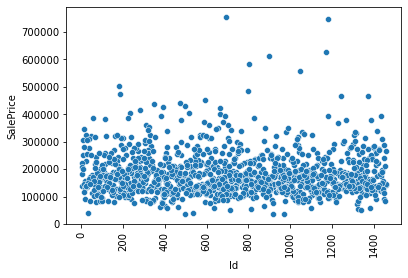

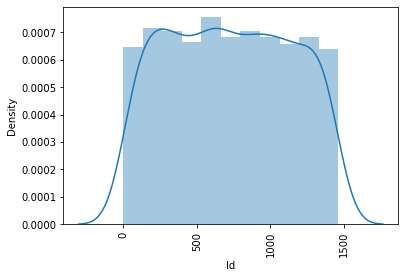

In [222]:
sns.scatterplot(df['Id'],df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.distplot(df['Id'])
plt.xticks(rotation=90)
plt.show()


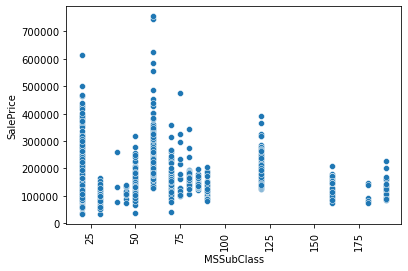

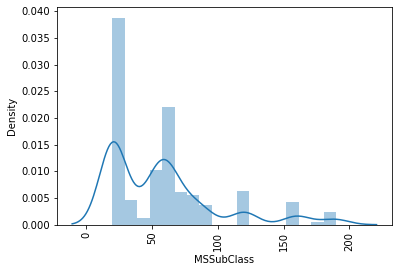

In [223]:
sns.scatterplot(df['MSSubClass'],df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.distplot(df['MSSubClass'])
plt.xticks(rotation=90)
plt.show()

#1-STORY 1946 & NEWER ALL STYLES has higher price
#2-STORY 1946 & NEWER has higher price.

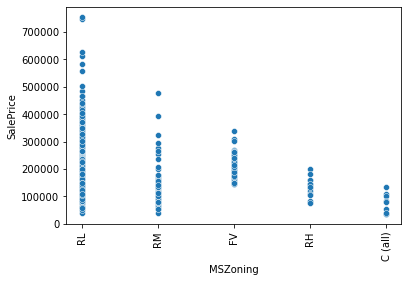

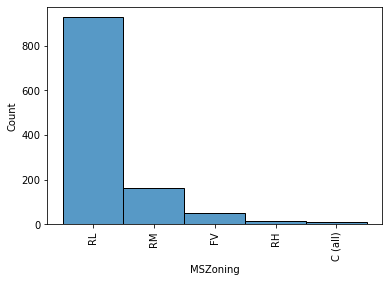

In [224]:
sns.scatterplot(df['MSZoning'],df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(df['MSZoning'])
plt.xticks(rotation=90)
plt.show()

#Residential Low Density houses can be sold at higher prices.
# Commercial(all) are generally sold at very low price.(Also present in very low numbers)


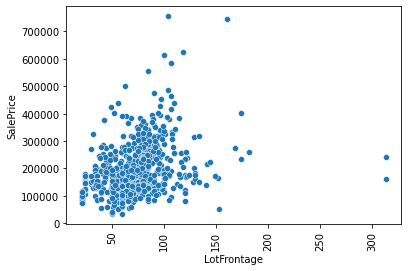

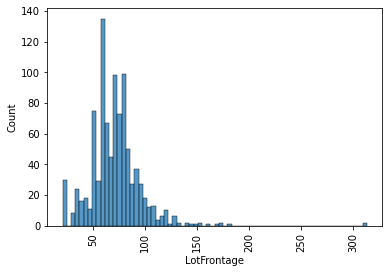

In [225]:
sns.scatterplot(df['LotFrontage'],df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(df['LotFrontage'])
plt.xticks(rotation=90)
plt.show()

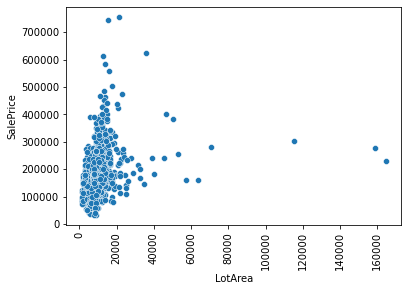

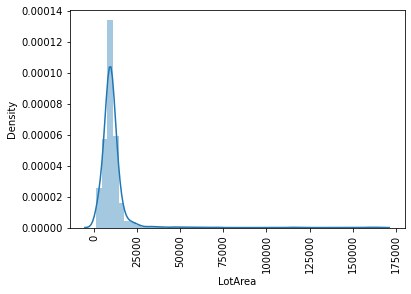

10.659284548299626


In [226]:
a=df['LotArea']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.distplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

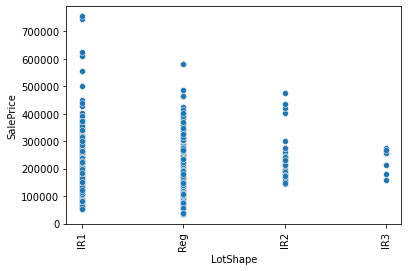

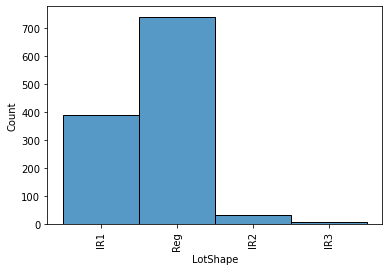

In [227]:
a=df['LotShape']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()


#irregular lot shape has lower price.
#most properties has regular lot size.

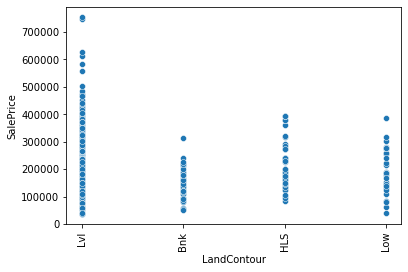

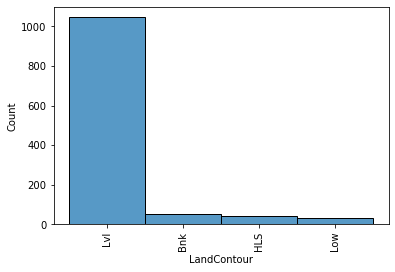

In [228]:
a=df['LandContour']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#level properties can be sold at higher price.

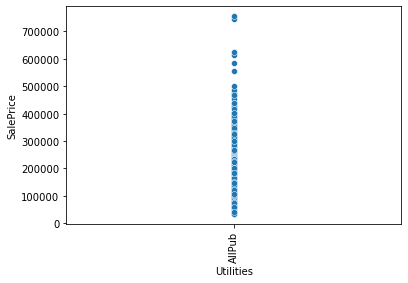

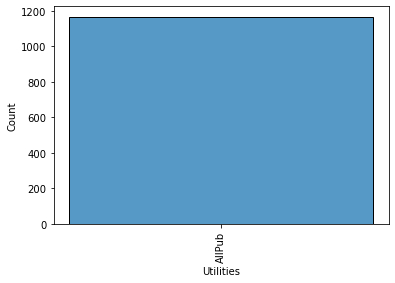

array(['AllPub'], dtype=object)

In [229]:
a=df['Utilities']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

df['Utilities'].unique()

#All the properties has all public utilities.
# Since all the properties has All public utilities

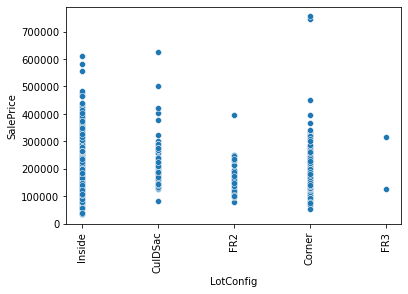

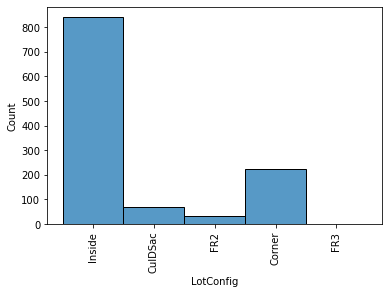

['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']


In [230]:
a=df['LotConfig']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

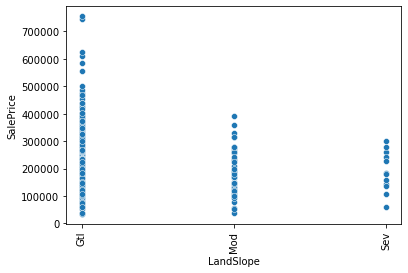

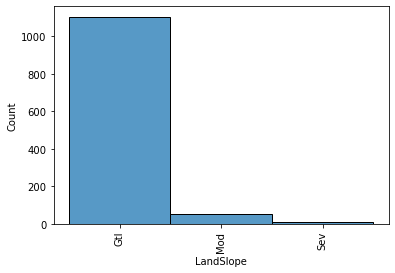

['Gtl' 'Mod' 'Sev']


In [231]:
a=df['LandSlope']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

#most buildings have gentle slope and they can be sold at higher price.

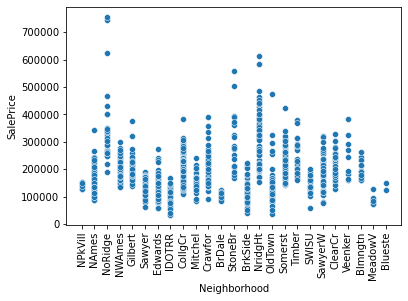

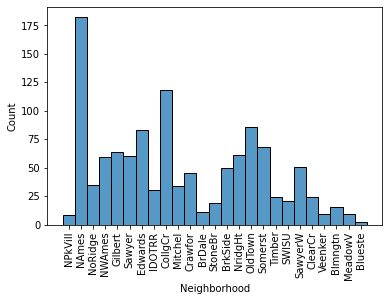

['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']


In [232]:
a=df['Neighborhood']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

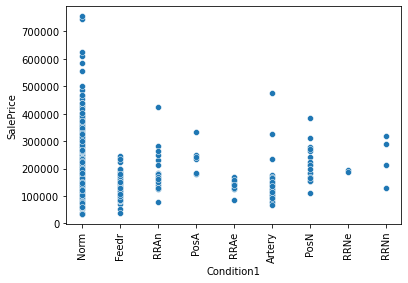

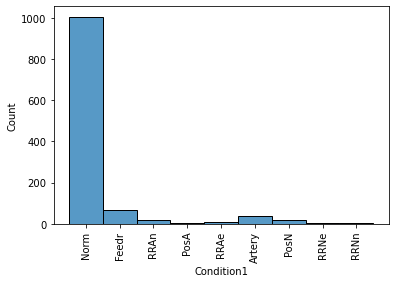

['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']


In [233]:
a=df['Condition1']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

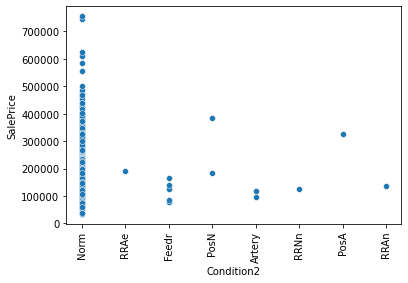

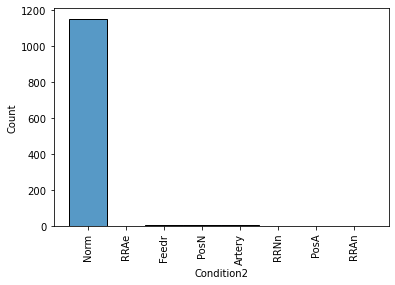

['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']


In [234]:
a=df['Condition2']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

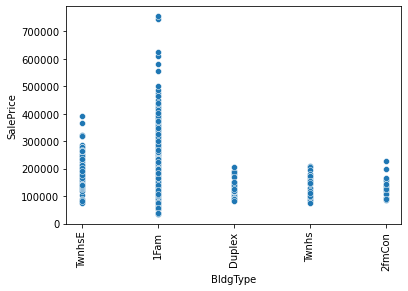

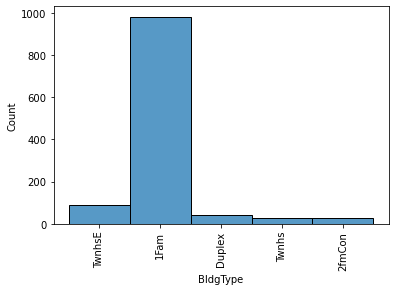

['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']


In [235]:
a=df['BldgType']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

#single family detached buildings can be sold at a higher price.

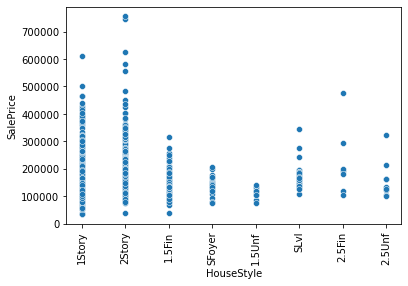

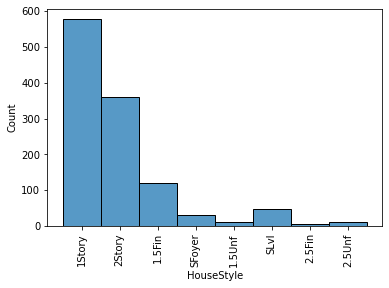

['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']


In [236]:
a=df['HouseStyle']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

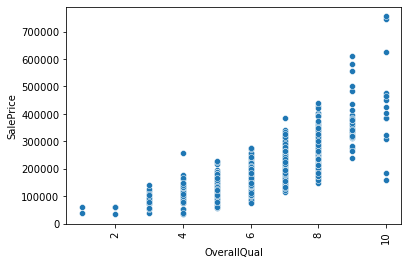

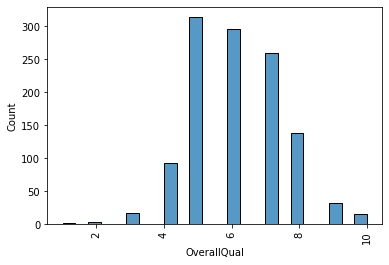

0.1750824992845271


In [237]:
a=df['OverallQual']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#price shows increse with overall quality.

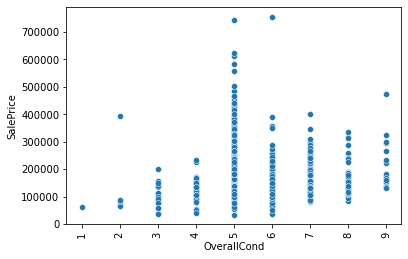

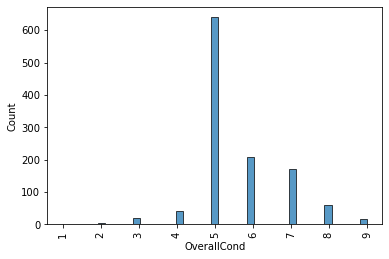

0.5807139655333367


In [238]:
a=df['OverallCond']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#price normally shows increase with overall condition.
#Overall condition=5 can show exceptionally high price.

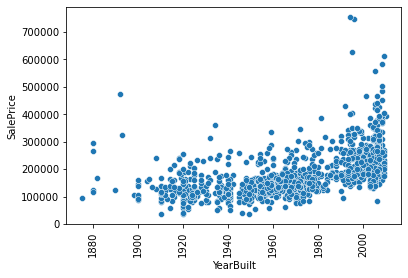

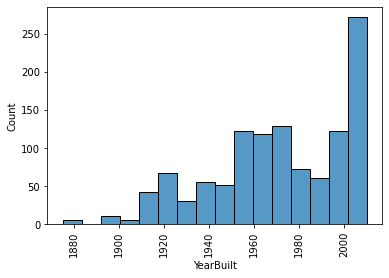

-0.5792035025736898


In [239]:
a=df['YearBuilt']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#Selling price is hgiher for newer buildings.

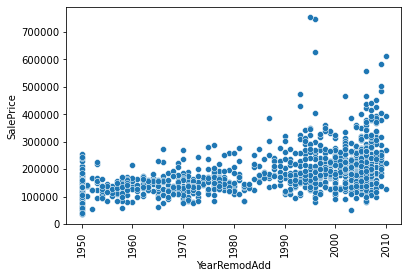

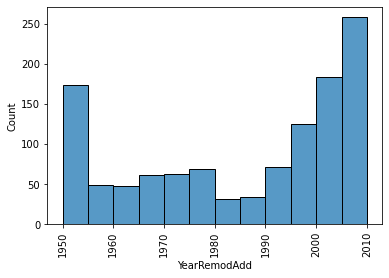

-0.49586353822203716


In [240]:
a=df['YearRemodAdd']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#price is higher for newly remodelled house.

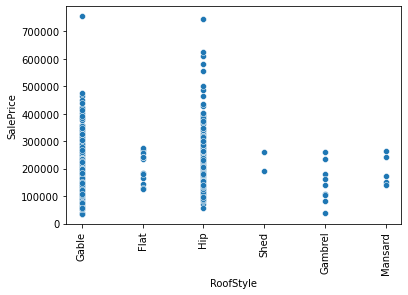

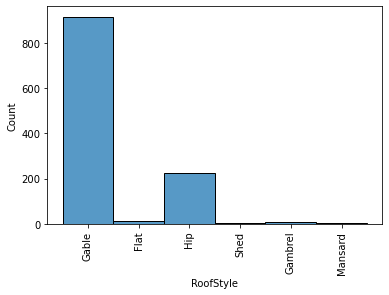

In [241]:
a=df['RoofStyle']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#'Hip' roofstyled buildings can be sold at a higher price followed by 'Gable'

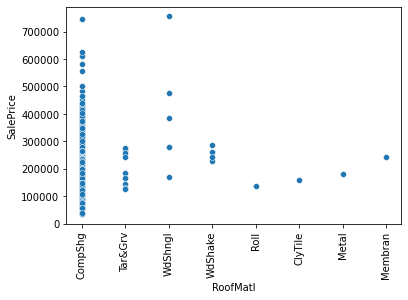

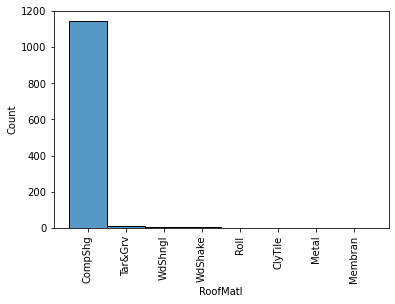

In [242]:
a=df['RoofMatl']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#buildings with roof material 'CompShg' and 'WdShngl' can be sold at a higher price.

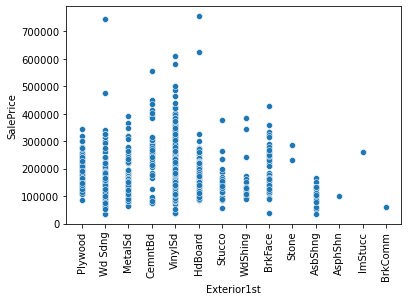

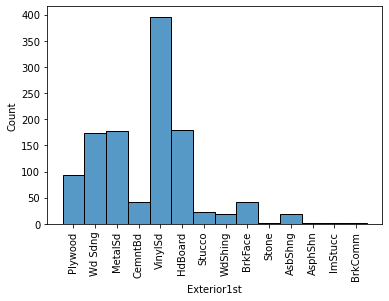

In [243]:
a=df['Exterior1st']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

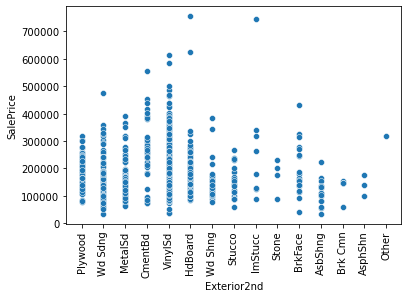

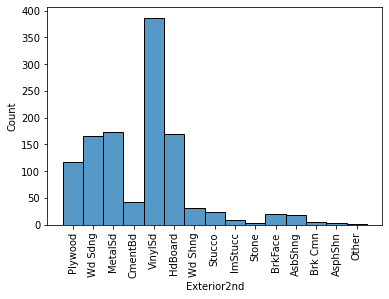

In [244]:
a=df['Exterior2nd']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

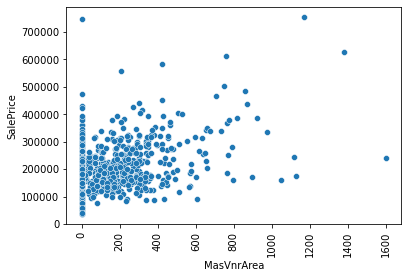

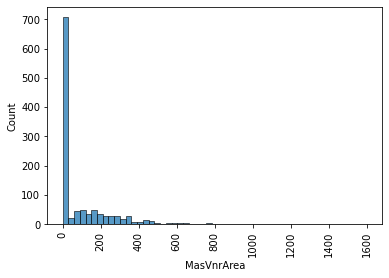

In [245]:
a=df['MasVnrArea']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#most buildings dont have masonry veneer area.
#price increases with masonry veneer area.

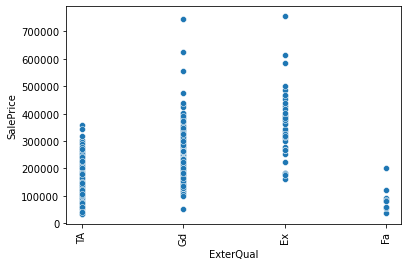

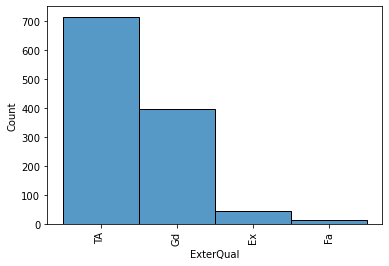

In [246]:
a=df['ExterQual']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#buildings having excellent exterior quality has higher price.

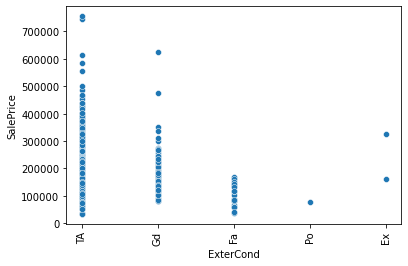

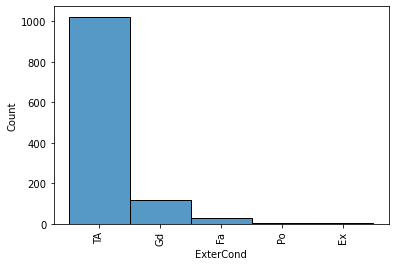

In [247]:
a=df['ExterCond']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

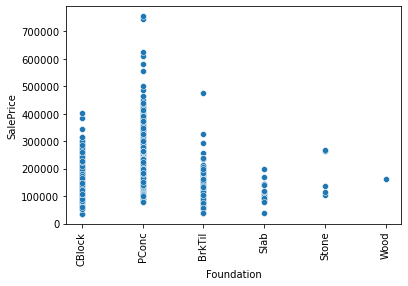

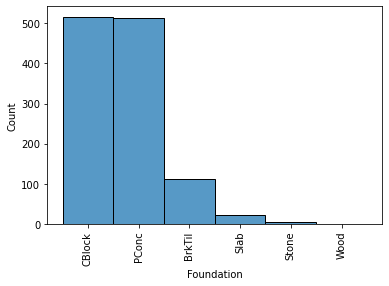

In [248]:
a=df['Foundation']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#Poured concrete buildings has higher price.

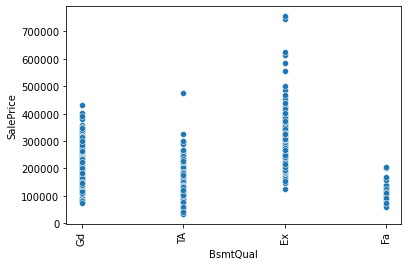

In [249]:
a=df['BsmtQual']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#better basement hgiher price.

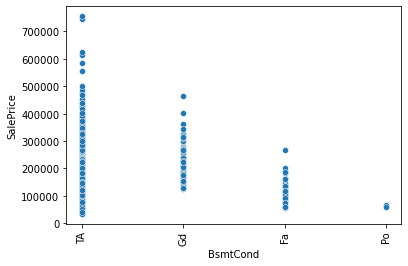

In [250]:
a=df['BsmtCond']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#no buildings have excellent basement condition.
#better the basement condition, higher  the price.



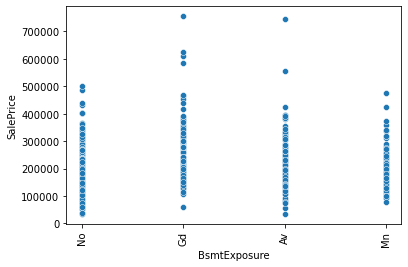

In [251]:
a=df['BsmtExposure']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#price is not varying much with basement exposure.

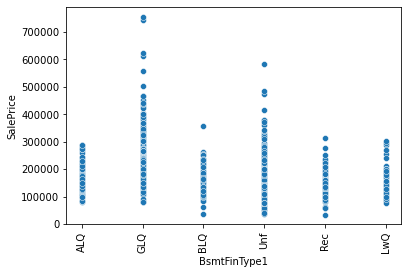

In [252]:
a=df['BsmtFinType1']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#basement finishing type 'GLQ' has a slightly higher price

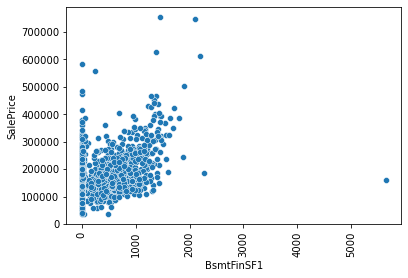

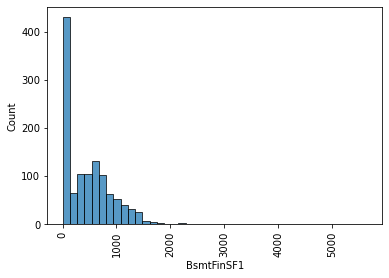

In [253]:
a=df['BsmtFinSF1']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#very hgih number of buildings has no finishing in basement
#price increases with basement finished area.

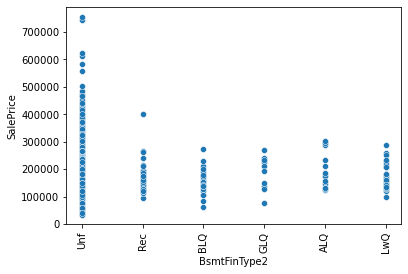

In [254]:
a=df['BsmtFinType2']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#basement finishing type2 'Unf' has a higher price

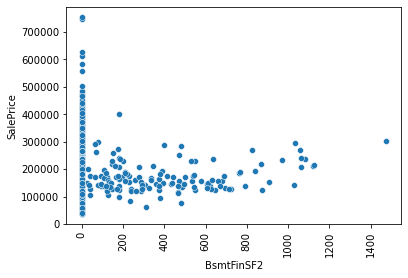

In [255]:
a=df['BsmtFinSF2']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#price is not varying much with basement finished area 2.

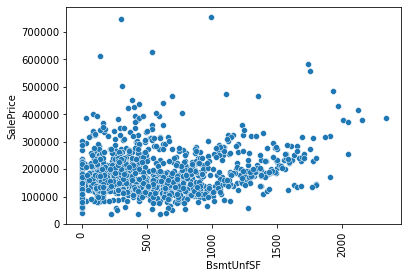

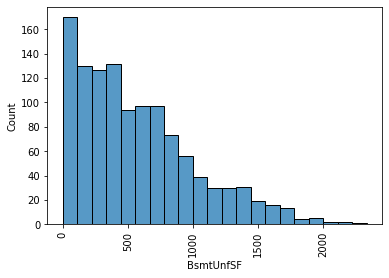

In [256]:
a=df['BsmtUnfSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#very few buildings are present where unfinished basement area is very low.

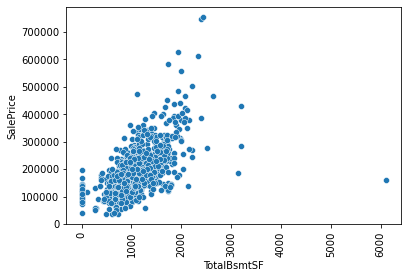

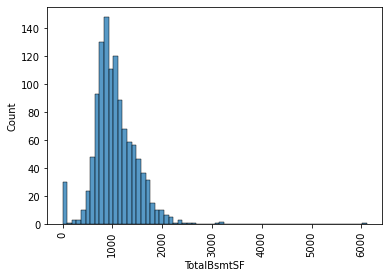

In [257]:
a=df['TotalBsmtSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#price is increasing with total basement surface area.

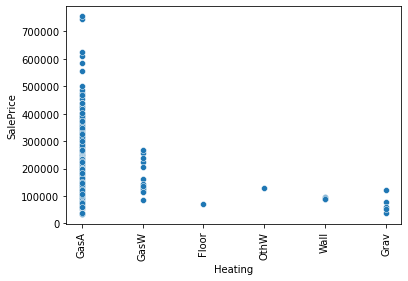

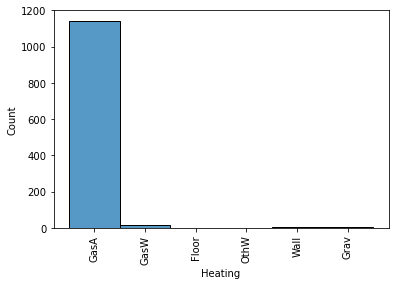

In [258]:
a=df['Heating']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

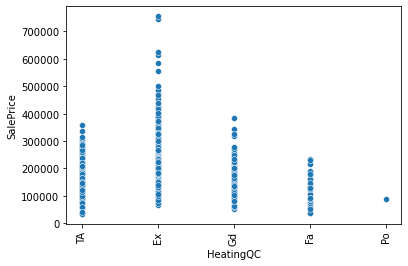

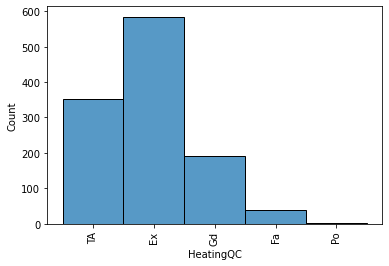

In [259]:
a=df['HeatingQC']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#better heating quality and condition gives better price.

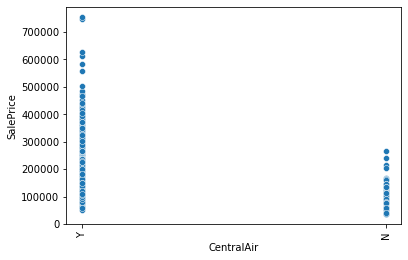

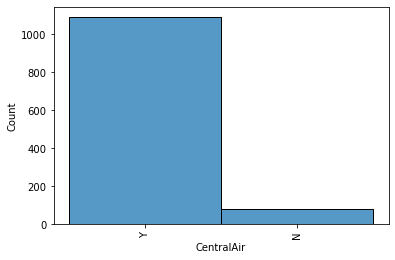

In [260]:
a=df['CentralAir']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#Most buildings have central air conditioner.
#centrally air conditioned buildings has higher price.

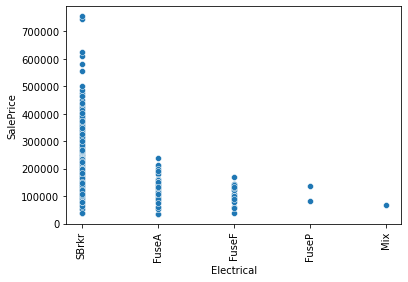

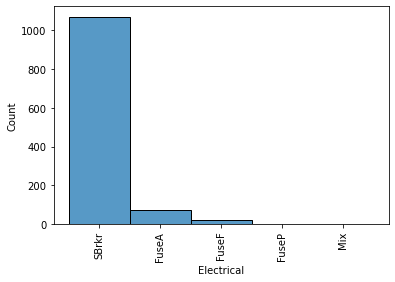

In [261]:
a=df['Electrical']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

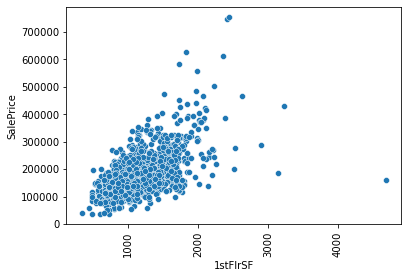

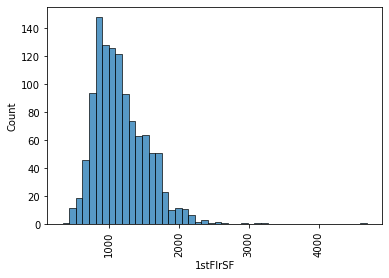

1.5137072331415693


In [262]:
a=df['1stFlrSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

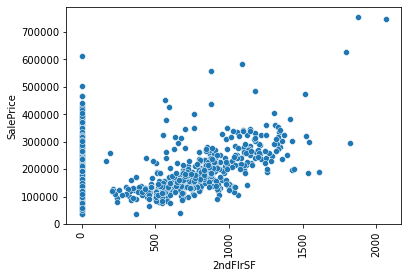

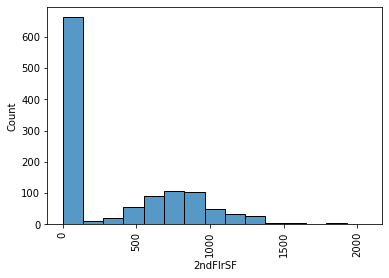

0.8234785103609108


In [263]:
a=df['2ndFlrSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#many buildings has no surface finish in second floor. 

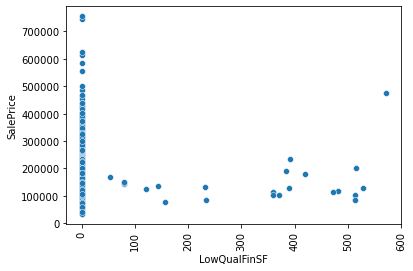

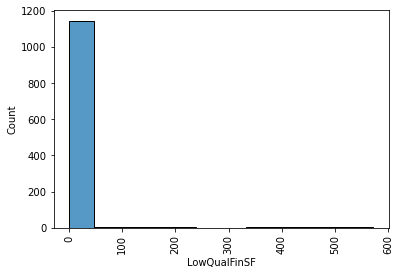

8.666142302049042


In [264]:
a=df['LowQualFinSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#low quality finished surface is less in most buildings.
#high skewness present

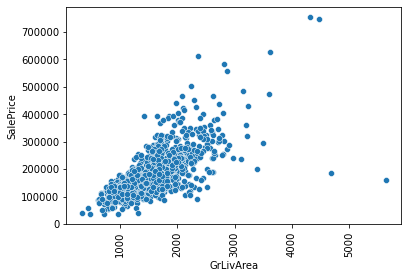

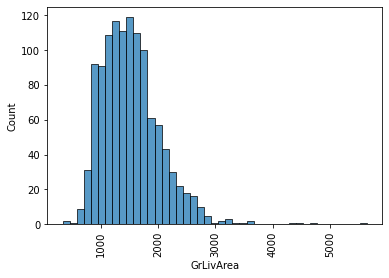

1.4499515426476701


In [265]:
a=df['GrLivArea']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

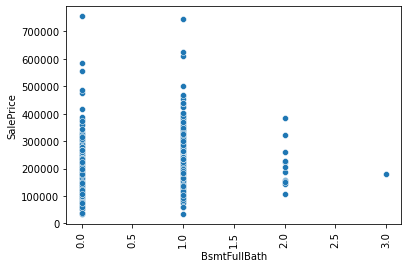

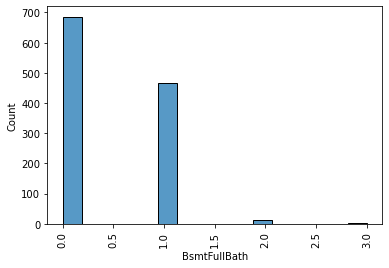

0.6271059162466773


In [266]:
a=df['BsmtFullBath']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

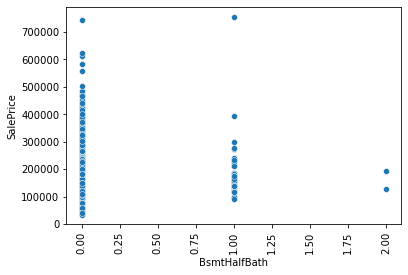

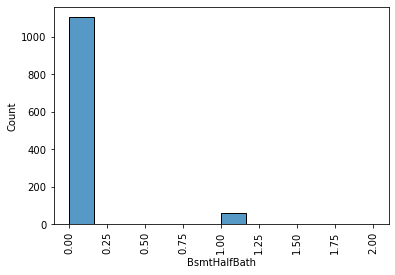

4.264402760829792


In [267]:
a=df['BsmtHalfBath']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#most buildings dont have half-bathrooms in basement 

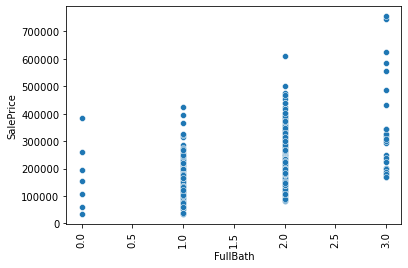

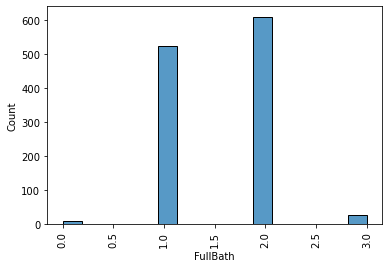

0.05780870861471475


In [268]:
a=df['FullBath']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#buildings with more number of bathrooms has higher price.

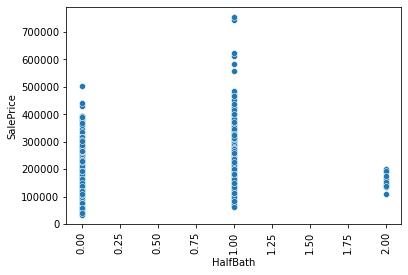

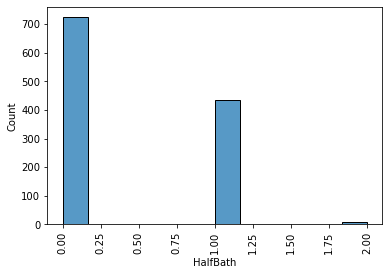

0.6564917514090118


In [269]:
a=df['HalfBath']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#half bath is not effecting the price much.

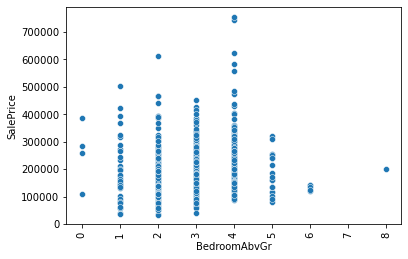

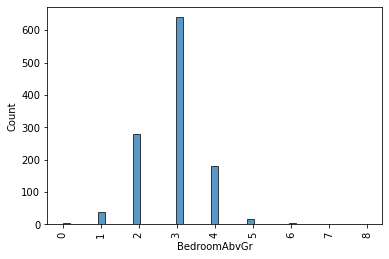

0.2438552945621391


In [270]:
a=df['BedroomAbvGr']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())


#buildings having 4 bed rooms above ground has slightly higher price.

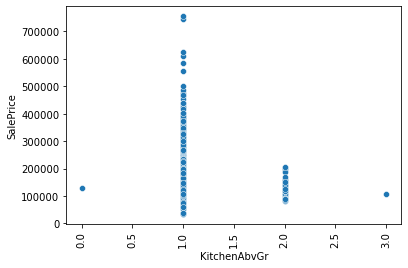

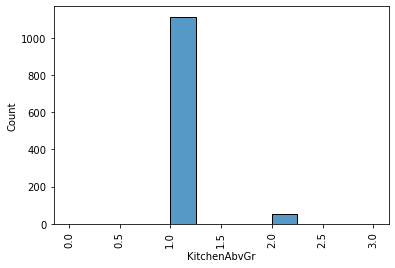

4.365258908133523


In [271]:
a=df['KitchenAbvGr']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#most buildings has single kitchen and it is not effecting the price much.

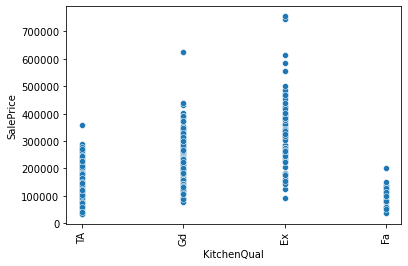

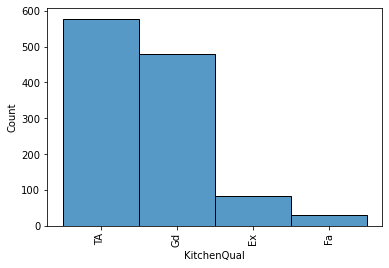

['TA' 'Gd' 'Ex' 'Fa']


In [272]:
a=df['KitchenQual']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

#higher price is obtained for better kitchen quality.

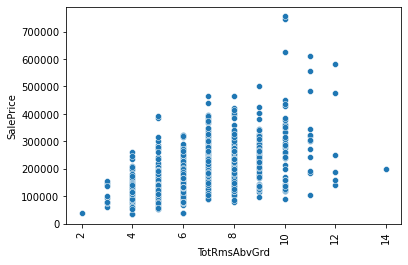

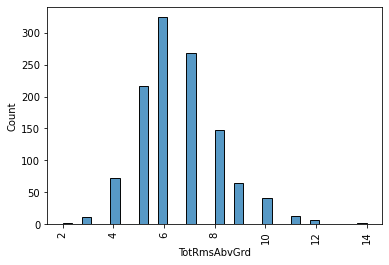

[ 5  8  7  9  6 12  4  2  3 10 11 14]


In [273]:
a=df['TotRmsAbvGrd']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

#price increases as the number of total rooms above ground inecreases.

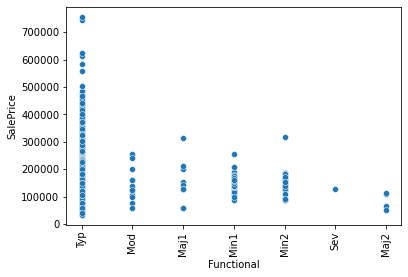

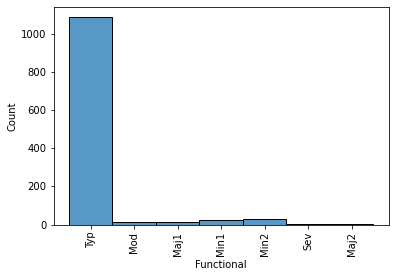

['Typ' 'Mod' 'Maj1' 'Min1' 'Min2' 'Sev' 'Maj2']


In [274]:
a=df['Functional']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

#price decreases  significantly if functionality is lower than 'typical'

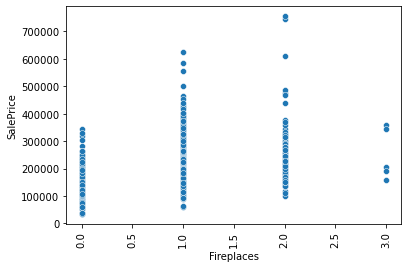

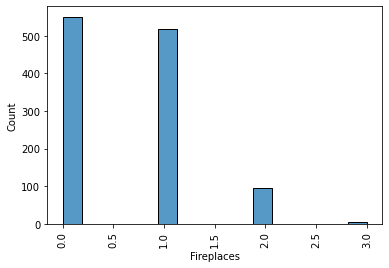

[1 0 2 3]


In [275]:
a=df['Fireplaces']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

#price increases shightly if atleast one fireplace is present
#price decreases if number of fireplaces is very high(ex-3)

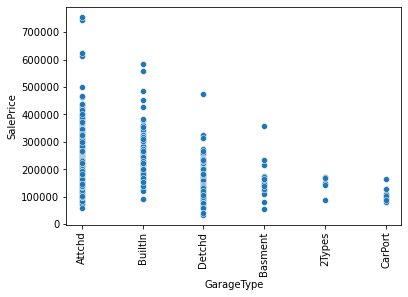

['Attchd' 'BuiltIn' 'Detchd' 'Basment' nan '2Types' 'CarPort']


In [276]:
a=df['GarageType']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()



print(a.unique())

#Properties with attached and built in garages has higher price.

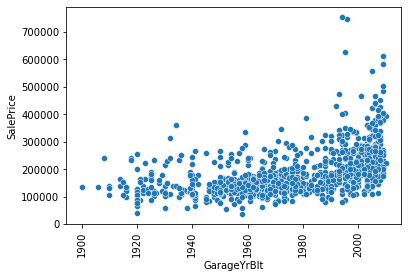

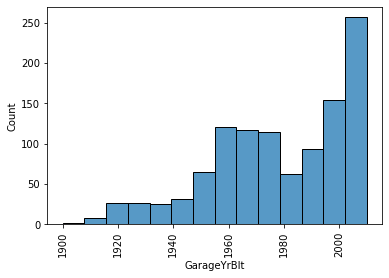

-0.6445640197769343


In [277]:
a=df['GarageYrBlt']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#properties with newer garages has higher price.

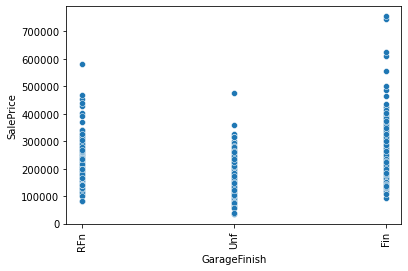

In [278]:
a=df['GarageFinish']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#prices increases slightlt with better finishing of garages.


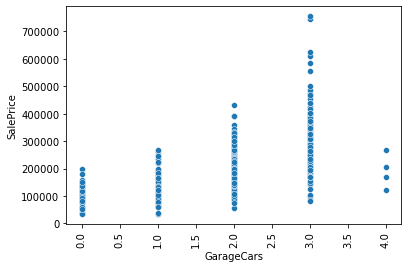

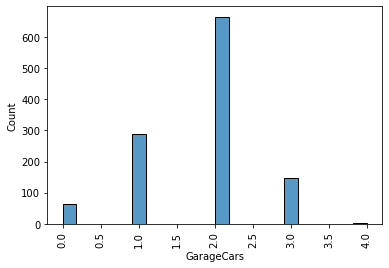

-0.3585558146314816


In [279]:
a=df['GarageCars']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

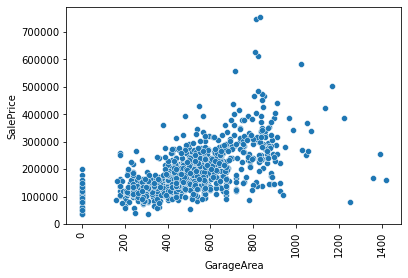

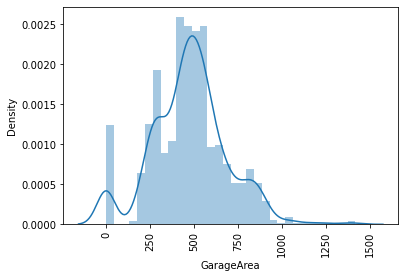

0.18966497539008143


In [280]:
a=df['GarageArea']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.distplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#price increases with garage area.

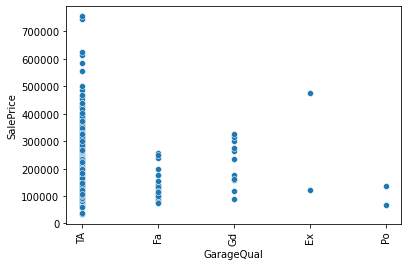

In [281]:
a=df['GarageQual']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


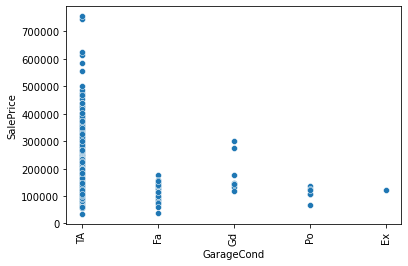

In [282]:
a=df['GarageCond']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#price is not depending much on garage condition.

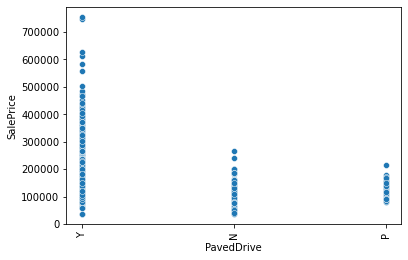

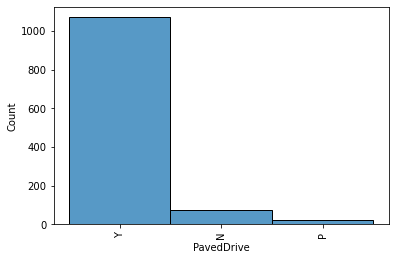

In [283]:
a=df['PavedDrive']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#mostly paved.
#paved has more price

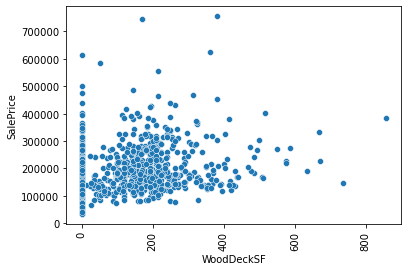

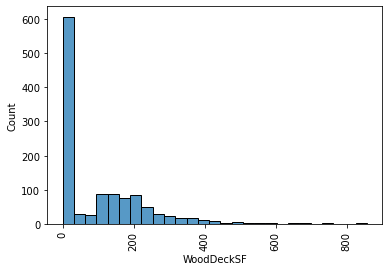

In [284]:
a=df['WoodDeckSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#better wood deck surface finish gives better price.

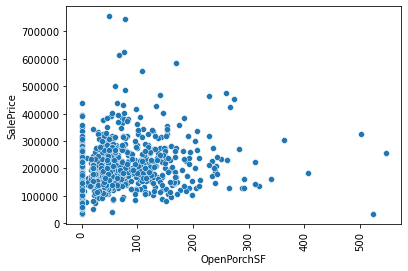

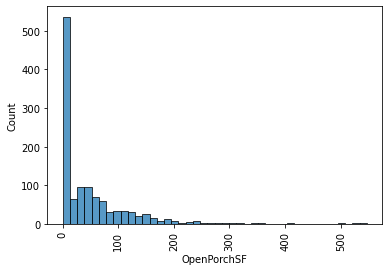

In [285]:
a=df['OpenPorchSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

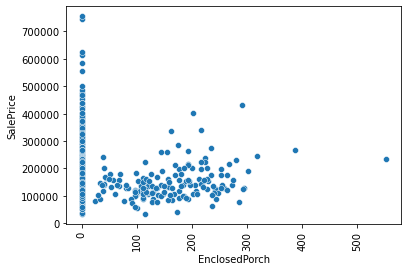

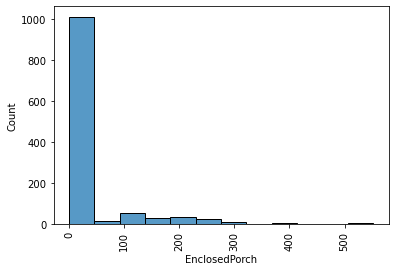

In [286]:
a=df['EnclosedPorch']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

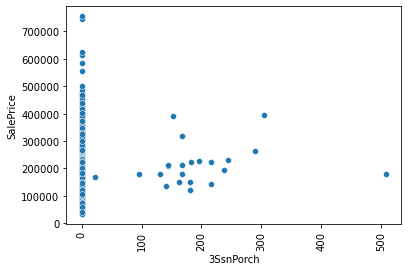

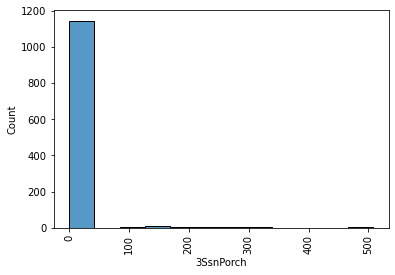

In [287]:
a=df['3SsnPorch']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

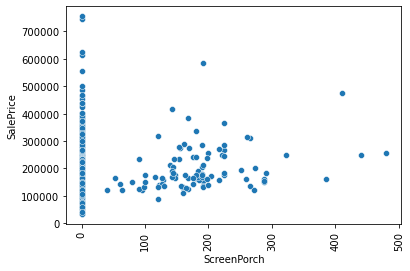

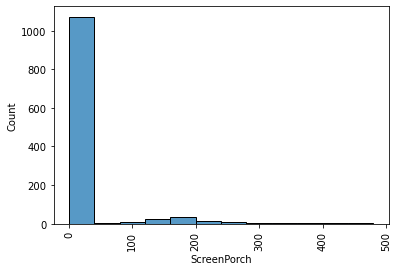

In [288]:
a=df['ScreenPorch']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#increases price

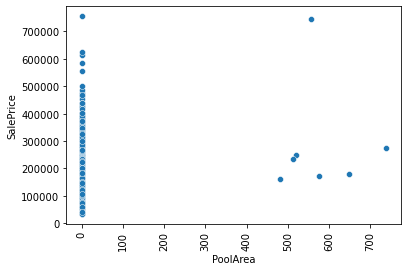

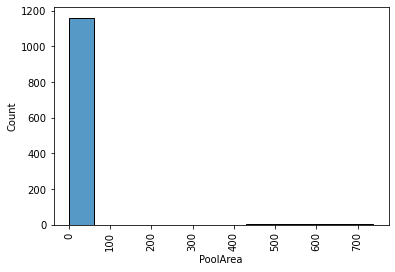

In [289]:
a=df['PoolArea']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()



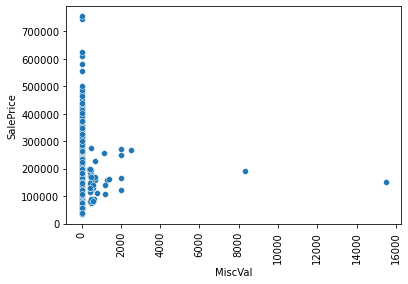

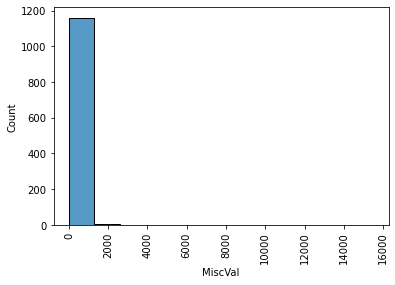

In [290]:
a=df['MiscVal']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

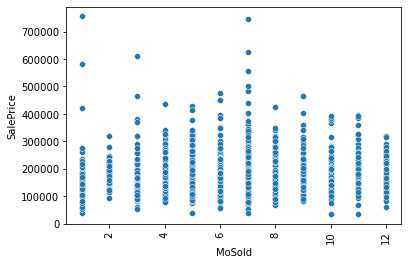

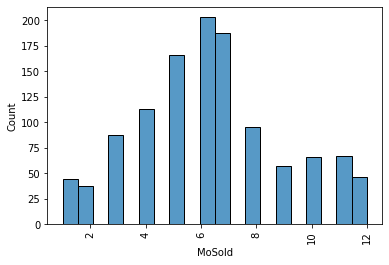

In [291]:
a=df['MoSold']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

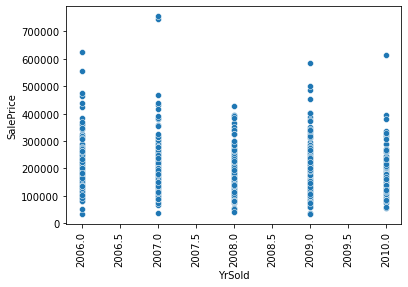

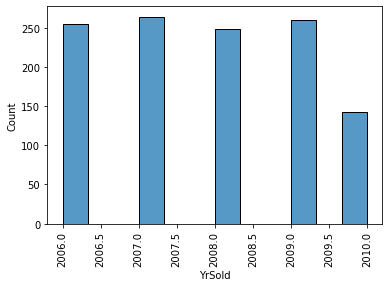

In [292]:
a=df['YrSold']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

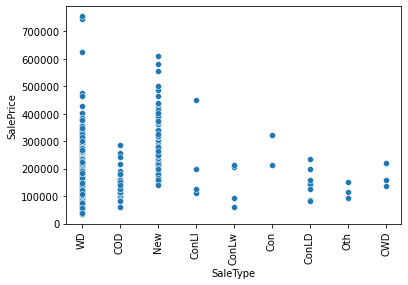

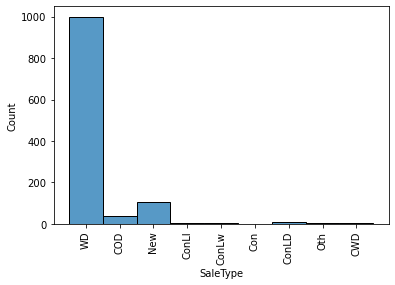

In [293]:
a=df['SaleType']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

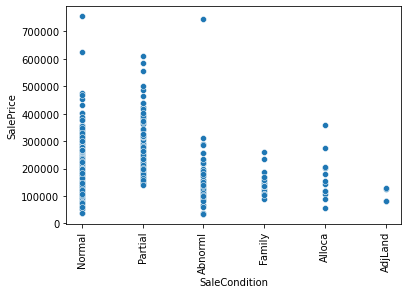

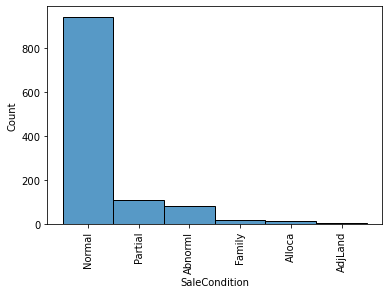

In [294]:
a=df['SaleCondition']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

# Data PreProcessing

In [295]:
for i in df.columns:
    print(i,'----->',df[i].isnull().sum())

Id -----> 0
MSSubClass -----> 0
MSZoning -----> 0
LotFrontage -----> 214
LotArea -----> 0
Street -----> 0
LotShape -----> 0
LandContour -----> 0
Utilities -----> 0
LotConfig -----> 0
LandSlope -----> 0
Neighborhood -----> 0
Condition1 -----> 0
Condition2 -----> 0
BldgType -----> 0
HouseStyle -----> 0
OverallQual -----> 0
OverallCond -----> 0
YearBuilt -----> 0
YearRemodAdd -----> 0
RoofStyle -----> 0
RoofMatl -----> 0
Exterior1st -----> 0
Exterior2nd -----> 0
MasVnrType -----> 7
MasVnrArea -----> 7
ExterQual -----> 0
ExterCond -----> 0
Foundation -----> 0
BsmtQual -----> 30
BsmtCond -----> 30
BsmtExposure -----> 31
BsmtFinType1 -----> 30
BsmtFinSF1 -----> 0
BsmtFinType2 -----> 31
BsmtFinSF2 -----> 0
BsmtUnfSF -----> 0
TotalBsmtSF -----> 0
Heating -----> 0
HeatingQC -----> 0
CentralAir -----> 0
Electrical -----> 0
1stFlrSF -----> 0
2ndFlrSF -----> 0
LowQualFinSF -----> 0
GrLivArea -----> 0
BsmtFullBath -----> 0
BsmtHalfBath -----> 0
FullBath -----> 0
HalfBath -----> 0
BedroomAbvGr -----

In [296]:
columns_nan=[]
for i in df.columns:
    if df[i].isnull().sum()>1:
        columns_nan.append(i)

In [297]:
columns_nan

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [298]:
a='LotFrontage'
print(a)
print(df[a].dtype)
print(df[a].mean())
print(df[a].median())
print(df[a].mode())

LotFrontage
float64
70.98846960167715
70.0
0    60.0
dtype: float64


In [299]:
df['LotFrontage'].fillna(value=df['LotFrontage'].mean(), inplace=True)

In [300]:
df1['LotFrontage'].fillna(value=df1['LotFrontage'].mean(), inplace=True)

In [301]:
a='MasVnrType'
print(a)
print(df[a].dtype)
print(df[a].mode())

MasVnrType
object
0    None
dtype: object


In [302]:
df['MasVnrType'].fillna(value=df['MasVnrType'].mode(), inplace=True)
df1['MasVnrType'].fillna(value=df1['MasVnrType'].mode(), inplace=True)

In [303]:
a='MasVnrArea'
print(a)
print(df[a].dtype)
print(df[a].mean())
print(df[a].median())
print(df[a].mode())

MasVnrArea
float64
102.31007751937985
0.0
0    0.0
dtype: float64


In [304]:
df['MasVnrArea'].fillna(value=df['MasVnrArea'].mean(), inplace=True)
df1['MasVnrArea'].fillna(value=df1['MasVnrArea'].mean(), inplace=True)

In [305]:
a='BsmtQual'
print(a)
print(df[a].dtype)
print(df[a].mode())

BsmtQual
object
0    TA
dtype: object


In [306]:
df['BsmtQual'].fillna(value=df['BsmtQual'].mode(), inplace=True)
df1['BsmtQual'].fillna(value=df1['BsmtQual'].mode(), inplace=True)

In [307]:
a='BsmtCond'
print(a)
print(df[a].dtype)
print(df[a].mode())

BsmtCond
object
0    TA
dtype: object


In [308]:
df['BsmtCond'].fillna(value=df['BsmtCond'].mode(), inplace=True)
df1['BsmtCond'].fillna(value=df1['BsmtCond'].mode(), inplace=True)

In [309]:
a='BsmtExposure'
print(a)
print(df[a].dtype)
print(df[a].mode())

BsmtExposure
object
0    No
dtype: object


In [310]:
df['BsmtExposure'].fillna(value=df['BsmtExposure'].mode(), inplace=True)
df1['BsmtExposure'].fillna(value=df1['BsmtExposure'].mode(), inplace=True)

In [311]:
columns_nan

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [312]:
a='BsmtFinType1'
print(a)
print(df[a].dtype)
print(df[a].mode())

BsmtFinType1
object
0    Unf
dtype: object


In [313]:
df['BsmtFinType1'].fillna(value=df['BsmtFinType1'].mode(), inplace=True)
df1['BsmtFinType1'].fillna(value=df1['BsmtFinType1'].mode(), inplace=True)

In [314]:
a='BsmtFinType2'
print(a)
print(df[a].dtype)
print(df[a].mode())

BsmtFinType2
object
0    Unf
dtype: object


In [315]:
df['BsmtFinType2'].fillna(value=df['BsmtFinType2'].mode(), inplace=True)
df1['BsmtFinType2'].fillna(value=df1['BsmtFinType2'].mode(), inplace=True)

In [316]:
a='GarageType'
print(a)
print(df[a].dtype)
print(df[a].mode())

GarageType
object
0    Attchd
dtype: object


In [317]:
df['GarageType'].fillna(value=df['GarageType'].mode(), inplace=True)
df1['GarageType'].fillna(value=df1['GarageType'].mode(), inplace=True)

In [318]:
a='GarageYrBlt'
print(a)
print(df[a].dtype)
print(df[a].mean())
print(df[a].median())
print(df[a].mode())

GarageYrBlt
float64
1978.1938405797102
1980.0
0    2006.0
dtype: float64


In [319]:
df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].median(), inplace=True)
df1['GarageYrBlt'].fillna(value=df1['GarageYrBlt'].median(), inplace=True)

In [320]:
a='GarageFinish'
print(a)
print(df[a].dtype)
print(df[a].mode())

GarageFinish
object
0    Unf
dtype: object


In [321]:
df['GarageFinish'].fillna(value=df['GarageFinish'].mode(), inplace=True)
df1['GarageFinish'].fillna(value=df1['GarageFinish'].mode(), inplace=True)

In [322]:
a='GarageQual'
print(a)
print(df[a].dtype)
print(df[a].mode())

GarageQual
object
0    TA
dtype: object


In [323]:
df['GarageQual'].fillna(value=df['GarageQual'].mode(), inplace=True)
df1['GarageQual'].fillna(value=df1['GarageQual'].mode(), inplace=True)

In [324]:
a='GarageCond'
print(a)
print(df[a].dtype)
print(df[a].mode())

GarageCond
object
0    TA
dtype: object


In [325]:
df['GarageCond'].fillna(value=df['GarageCond'].mode(), inplace=True)
df1['GarageCond'].fillna(value=df1['GarageCond'].mode(), inplace=True)

In [326]:
for i in df.columns:
    print(i,'---->',df[i].dtypes)

Id ----> int64
MSSubClass ----> int64
MSZoning ----> object
LotFrontage ----> float64
LotArea ----> int64
Street ----> object
LotShape ----> object
LandContour ----> object
Utilities ----> object
LotConfig ----> object
LandSlope ----> object
Neighborhood ----> object
Condition1 ----> object
Condition2 ----> object
BldgType ----> object
HouseStyle ----> object
OverallQual ----> int64
OverallCond ----> int64
YearBuilt ----> int64
YearRemodAdd ----> int64
RoofStyle ----> object
RoofMatl ----> object
Exterior1st ----> object
Exterior2nd ----> object
MasVnrType ----> object
MasVnrArea ----> float64
ExterQual ----> object
ExterCond ----> object
Foundation ----> object
BsmtQual ----> object
BsmtCond ----> object
BsmtExposure ----> object
BsmtFinType1 ----> object
BsmtFinSF1 ----> int64
BsmtFinType2 ----> object
BsmtFinSF2 ----> int64
BsmtUnfSF ----> int64
TotalBsmtSF ----> int64
Heating ----> object
HeatingQC ----> object
CentralAir ----> object
Electrical ----> object
1stFlrSF ----> int64
2n

In [327]:
df.shape

(1168, 76)

In [328]:
df1.shape

(292, 75)

In [329]:
df1=df1[df1.Utilities != 'NoSeWa']

In [330]:
df1=df1[df1.Exterior1st != 'CBlock']

In [331]:
df1=df1[df1.Exterior2nd != 'CBlock']

In [333]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype==object:
        df[i]=le.fit_transform(df[i])
        df1[i]=le.transform(df1[i])
        

In [334]:
for i in df.columns:
    print(i,'---->',df[i].dtypes)

Id ----> int64
MSSubClass ----> int64
MSZoning ----> int32
LotFrontage ----> float64
LotArea ----> int64
Street ----> int32
LotShape ----> int32
LandContour ----> int32
Utilities ----> int32
LotConfig ----> int32
LandSlope ----> int32
Neighborhood ----> int32
Condition1 ----> int32
Condition2 ----> int32
BldgType ----> int32
HouseStyle ----> int32
OverallQual ----> int64
OverallCond ----> int64
YearBuilt ----> int64
YearRemodAdd ----> int64
RoofStyle ----> int32
RoofMatl ----> int32
Exterior1st ----> int32
Exterior2nd ----> int32
MasVnrType ----> int32
MasVnrArea ----> float64
ExterQual ----> int32
ExterCond ----> int32
Foundation ----> int32
BsmtQual ----> int32
BsmtCond ----> int32
BsmtExposure ----> int32
BsmtFinType1 ----> int32
BsmtFinSF1 ----> int64
BsmtFinType2 ----> int32
BsmtFinSF2 ----> int64
BsmtUnfSF ----> int64
TotalBsmtSF ----> int64
Heating ----> int32
HeatingQC ----> int32
CentralAir ----> int32
Electrical ----> int32
1stFlrSF ----> int64
2ndFlrSF ----> int64
LowQualFin

<AxesSubplot:>

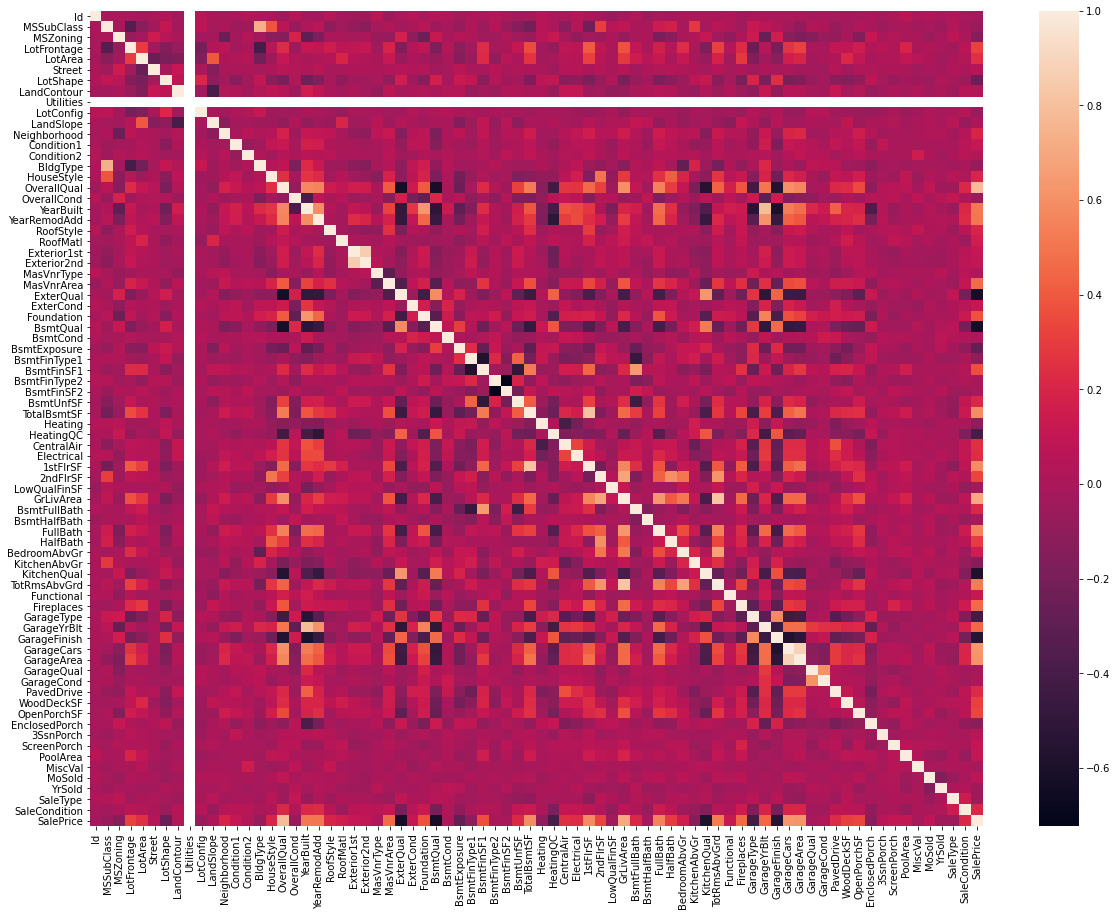

In [335]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

In [336]:
#utilities has no correlation with any input column as well as the target column
#so we are dropping the utilities column
df=df.drop(columns=['Utilities'],axis=1)
df1=df1.drop(columns=['Utilities'],axis=1)

In [337]:
df.corr()['SalePrice'].sort_values(ascending=False)[0:20]

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
TotalBsmtSF     0.595042
1stFlrSF        0.587642
FullBath        0.554988
TotRmsAbvGrd    0.528363
YearBuilt       0.514408
YearRemodAdd    0.507831
MasVnrArea      0.463626
Fireplaces      0.459611
GarageYrBlt     0.453840
Foundation      0.374169
BsmtFinSF1      0.362874
OpenPorchSF     0.339500
2ndFlrSF        0.330386
LotFrontage     0.323779
WoodDeckSF      0.315444
Name: SalePrice, dtype: float64

In [338]:
df.corr()['SalePrice'].sort_values(ascending=False)[20:40]

HalfBath         0.295592
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
PoolArea         0.103280
ScreenPorch      0.100284
Exterior2nd      0.097541
Name: SalePrice, dtype: float64

In [339]:
df.corr()['SalePrice'].sort_values(ascending=False)[40:60]

MoSold          0.072764
3SsnPorch       0.060119
Street          0.044753
Condition2      0.033956
LandContour     0.032836
GarageCond      0.023187
MasVnrType      0.022340
LandSlope       0.015485
BsmtCond        0.012224
BsmtFinType2    0.007464
BsmtFinSF2     -0.010151
GarageQual     -0.010948
BsmtHalfBath   -0.011109
MiscVal        -0.013071
Id             -0.023897
LowQualFinSF   -0.032381
YrSold         -0.045508
SaleType       -0.050851
LotConfig      -0.060452
MSSubClass     -0.060775
Name: SalePrice, dtype: float64

In [340]:
df_rev=df.drop(columns=['MoSold','3SsnPorch','Street','Condition2','LandContour','GarageCond','MasVnrType','LandSlope','BsmtCond','BsmtFinType2','BsmtFinSF2','GarageQual','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','SaleType','LotConfig','MSSubClass','Exterior2nd','PoolArea','Condition1','Exterior1st','BedroomAbvGr','RoofMatl','RoofStyle','Neighborhood'],axis=1)
df1_rev=df1.drop(columns=['MoSold','3SsnPorch','Street','Condition2','LandContour','GarageCond','MasVnrType','LandSlope','BsmtCond','BsmtFinType2','BsmtFinSF2','GarageQual','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','SaleType','LotConfig','MSSubClass','Exterior2nd','PoolArea','Condition1','Exterior1st','BedroomAbvGr','RoofMatl','RoofStyle','Neighborhood'],axis=1)
df_irev=df.drop(columns=['MoSold','MasVnrType','Id','YrSold','LotConfig'],axis=1)
df1_irev=df1.drop(columns=['MoSold','MasVnrType','Id','YrSold','LotConfig'],axis=1)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

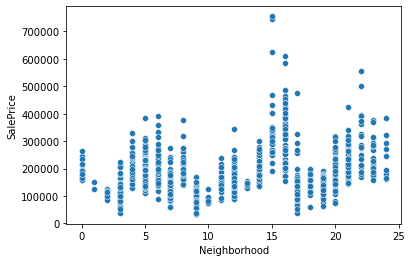

In [341]:
sns.scatterplot(df['Neighborhood'],df['SalePrice'])

In [342]:
df.corr()['SalePrice'].sort_values(ascending=False)[60:80]

OverallCond     -0.065642
BldgType        -0.066028
Heating         -0.100021
BsmtFinType1    -0.103033
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
MSZoning        -0.133221
LotShape        -0.248171
BsmtExposure    -0.282480
HeatingQC       -0.406604
GarageType      -0.415370
GarageFinish    -0.550624
KitchenQual     -0.592468
ExterQual       -0.624820
BsmtQual        -0.628798
Name: SalePrice, dtype: float64

In [343]:
df_rev=df_rev.drop(columns=['OverallCond','BldgType'],axis=1)
df1_rev=df1_rev.drop(columns=['OverallCond','BldgType'],axis=1)

In [344]:
#now we will de dropping those columns which has high correlation with each other.

<AxesSubplot:>

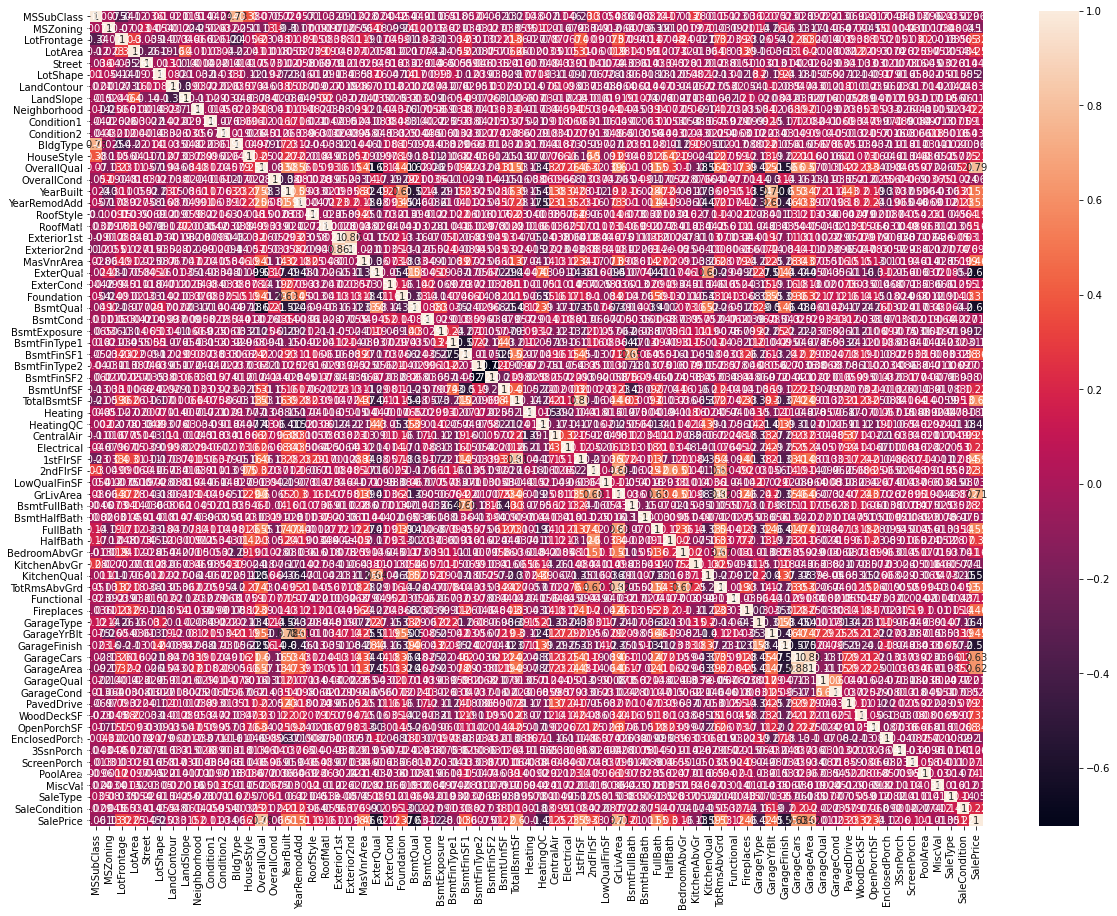

In [346]:
plt.figure(figsize=(20,15))
sns.heatmap(df_irev.corr(),annot=True)

<AxesSubplot:>

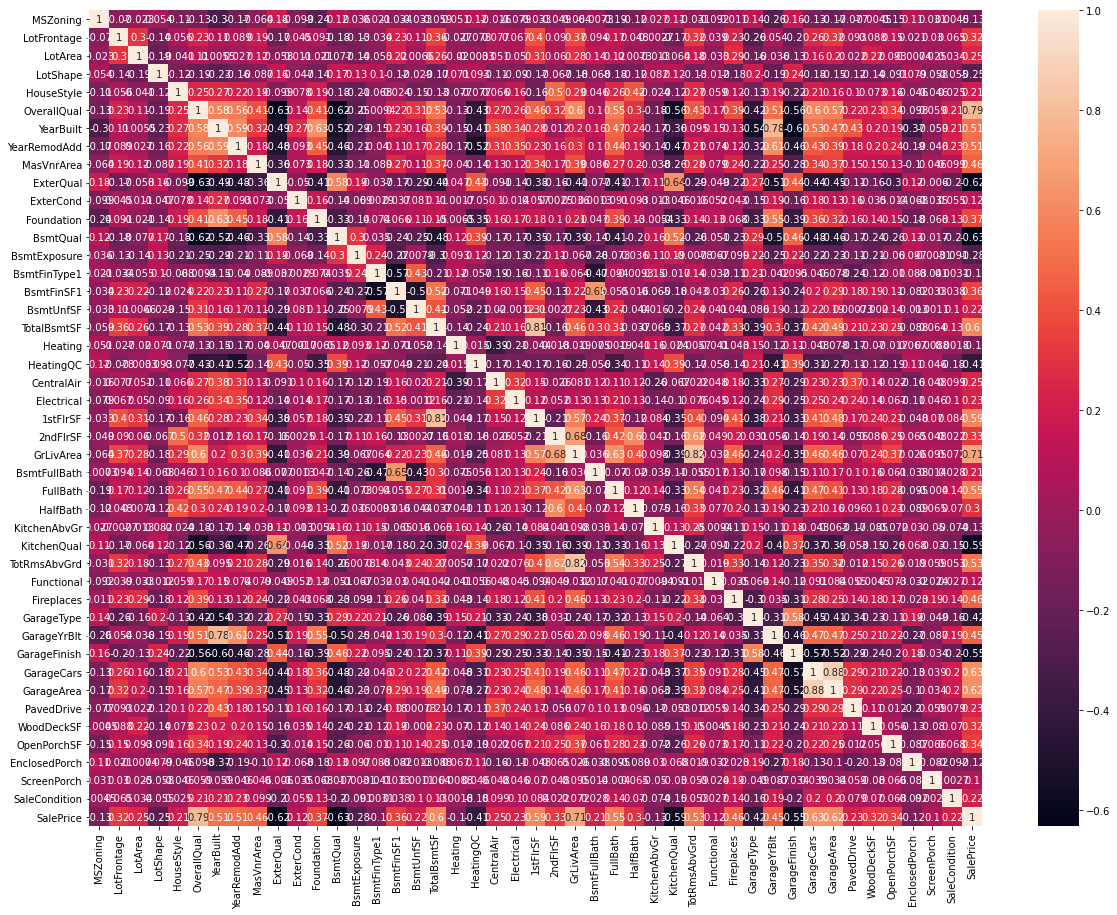

In [347]:
plt.figure(figsize=(20,15))
sns.heatmap(df_rev.corr(),annot=True)

In [348]:
df_rev.shape

(1168, 45)

In [349]:
df_irev.shape

(1168, 70)

In [350]:
df_rev.skew().sort_values(ascending=False)

LotArea          10.659285
Heating          10.103609
KitchenAbvGr      4.365259
ScreenPorch       4.105741
EnclosedPorch     3.043610
MasVnrArea        2.834658
LotFrontage       2.710383
OpenPorchSF       2.410840
SalePrice         1.953878
BsmtFinSF1        1.871606
TotalBsmtSF       1.744591
1stFlrSF          1.513707
WoodDeckSF        1.504929
GrLivArea         1.449952
BsmtUnfSF         0.909057
2ndFlrSF          0.823479
Fireplaces        0.671966
HalfBath          0.656492
TotRmsAbvGrd      0.644657
BsmtFullBath      0.627106
GarageType        0.625609
HeatingQC         0.449933
HouseStyle        0.285680
GarageArea        0.189665
OverallQual       0.175082
FullBath          0.057809
Foundation       -0.002761
BsmtFinType1     -0.019567
GarageFinish     -0.129987
GarageCars       -0.358556
YearRemodAdd     -0.495864
YearBuilt        -0.579204
LotShape         -0.603775
GarageYrBlt      -0.674913
BsmtExposure     -1.075098
BsmtQual         -1.107099
KitchenQual      -1.408106
M

In [351]:
df1_rev['Electrical']=le.fit_transform(df1_rev['Electrical'])

In [352]:
pt=PowerTransformer()

In [353]:
for i in df_rev.columns[0:-1]:
    if np.abs(df_rev[i].skew())>0.65:
        pt=PowerTransformer()
        df_rev[i]=pt.fit_transform(df_rev[i].values.reshape(-1,1))
        df1_rev[i]=pt.transform(df1_rev[i].values.reshape(-1,1))
        
    

In [354]:
df1_irev['Electrical']=le.fit_transform(df1_irev['Electrical'])

In [355]:
for i in df_irev.columns[0:-1]:
    if np.abs(df_irev[i].skew())>0.65:
        pt=PowerTransformer()
        df_irev[i]=pt.fit_transform(df_irev[i].values.reshape(-1,1))
        df1_irev[i]=pt.transform(df1_irev[i].values.reshape(-1,1))

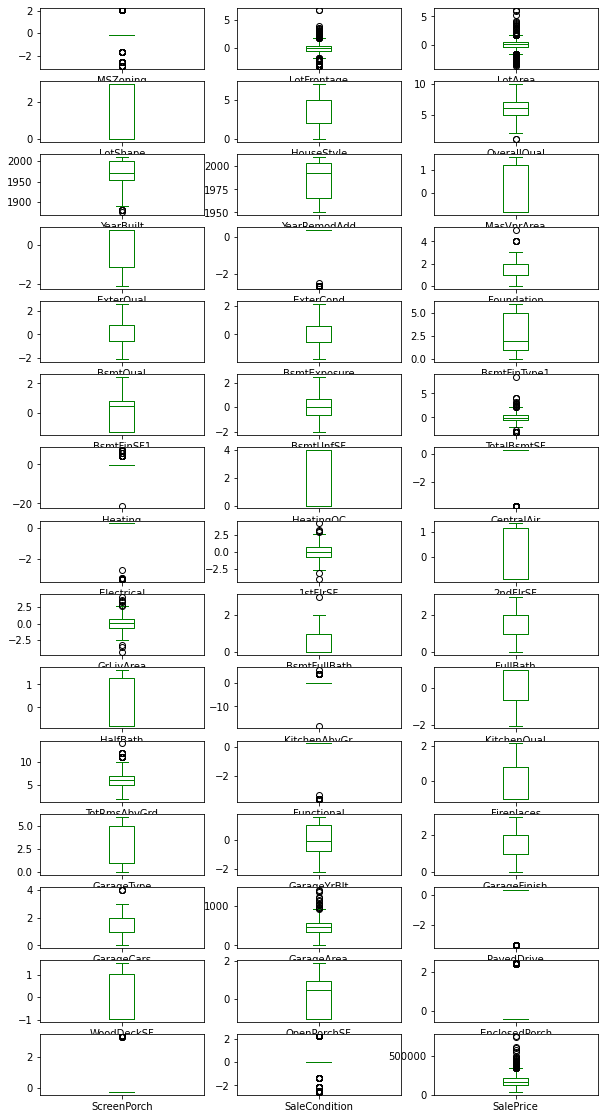

In [356]:
df_rev.plot(kind='box',subplots=True,layout=(15,3),figsize=(10,20),color='green')
plt.show()

# Outlier removal

In [357]:
#outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df_rev))


df_new=df_rev[(z<3.0).all(axis=1)]
print(df_rev.shape)
print(df_new.shape)

print("loss_percent= ",(df_rev.shape[0]-df_new.shape[0])/df_rev.shape[0]*100)

(1168, 45)
(760, 45)
loss_percent=  34.93150684931507


In [358]:
from scipy.stats import zscore
z=np.abs(zscore(df_rev['SalePrice']))


df_new=df_rev[(z<3)]
print(df_rev.shape)
print(df_new.shape)
loss_percent=(df_rev.shape[0]-df_new.shape[0])/df_rev.shape[0]*100
print("loss_percent= ",loss_percent)


(1168, 45)
(1151, 45)
loss_percent=  1.4554794520547945


In [359]:
for i in df_rev.columns:
    z=np.abs(zscore(df_rev[i]))
    df_new=df_rev[(z<3)]
    loss_percent=(df_rev.shape[0]-df_new.shape[0])/df_rev.shape[0]*100
    if loss_percent==100:
        print(i)



In [360]:
for i in df_rev.columns:
    z=np.abs(zscore(df_rev[i]))
    df_new=df_rev[(z<3)]
    loss_percent=(df_rev.shape[0]-df_new.shape[0])/df_rev.shape[0]*100
    if loss_percent>20:
        print(i)


In [361]:
#outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df_rev.drop(columns=['MasVnrArea'],axis=1)))


df_new=df_rev[(z<3.0).all(axis=1)]
print(df_rev.shape)
print(df_new.shape)

print("loss_percent= ",(df_rev.shape[0]-df_new.shape[0])/df_rev.shape[0]*100)

#Data loss due to outlier removal is very high.
#Using z<3.75 instead of z<3

(1168, 45)
(760, 45)
loss_percent=  34.93150684931507


In [362]:
#outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df_rev.drop(columns=['MasVnrArea'],axis=1)))


df_new=df_rev[(z<3.75).all(axis=1)]
print(df_rev.shape)
print(df_new.shape)

print("loss_percent= ",(df_rev.shape[0]-df_new.shape[0])/df_rev.shape[0]*100)


(1168, 45)
(1070, 45)
loss_percent=  8.39041095890411


In [363]:
df_rev=df_new

In [364]:
#outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df_irev))


df_new=df_irev[(z<3.0).all(axis=1)]
print(df_irev.shape)
print(df_new.shape)

print("loss_percent= ",(df_irev.shape[0]-df_new.shape[0])/df_irev.shape[0]*100)

(1168, 70)
(581, 70)
loss_percent=  50.2568493150685


In [365]:
#outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df_irev.drop(columns=['MasVnrArea'],axis=1)))


df_new=df_irev[(z<4).all(axis=1)]
print(df_irev.shape)
print(df_new.shape)

print("loss_percent= ",(df_irev.shape[0]-df_new.shape[0])/df_irev.shape[0]*100)


(1168, 70)
(900, 70)
loss_percent=  22.945205479452056


In [366]:
df_irev=df_new

# Model training starts

#### trying the linear regression model

In [325]:
#testing with df_rev
x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.8423226193842681
root_mean_sqaured_error: 28307.17047786369
mean_absolute_error: 19604.717019380405


In [336]:
#testing with df_irev

x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.8618317512267011
root_mean_sqaured_error: 29352.364353237892
mean_absolute_error: 20499.35796575262


In [338]:
#trying different polynomials for LinearRegression with df
#varying the degree of polynomial in default Linear regresion model and finding their accuracy

x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values


#degree=1
r=LinearRegression()
poly = PolynomialFeatures(1)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 1')
print('r2_score is:',r2_score(y_test,y_pred))

#degree=2
r=LinearRegression()
poly = PolynomialFeatures(2)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 2')
print('r2_score is:',r2_score(y_test,y_pred))

#degree=3
r=LinearRegression()
poly = PolynomialFeatures(3)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 3')
print('r2_score is:',r2_score(y_test,y_pred))

#we are getting the best r2_score with polynomial 1.
#So we are approaching with polynomial 1

polynomial is: 1
r2_score is: 0.8423226193842692
polynomial is: 2
r2_score is: -53.36950899569521
polynomial is: 3
r2_score is: -1.3002652917558208


In [347]:
#Since the number of columns is high, we can try applying PCA
#trying different regression models with n_components=5
x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

pca=PCA(n_components=40)
xpca=pca.fit_transform(x_train)
xpca_test=pca.fit_transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.3456330982792314
r2_score for RandomForestRegression is:  0.38588433028223124
r2_score for KNeighborsRegression is:  0.45423980648088536


In [346]:
#Since the number of columns is high, we can try applying PCA
#trying different regression models with n_components=40
x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

pca=PCA(n_components=42)
xpca=pca.fit_transform(x_train)
xpca_test=pca.fit_transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.34546633546329353
r2_score for RandomForestRegression is:  0.37699424367891166
r2_score for KNeighborsRegression is:  0.45423980648088536


In [348]:
#Since the number of columns is high, we can try applying PCA
#trying different regression models with n_components=30
x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

pca=PCA(n_components=42)
xpca=pca.fit_transform(x_train)
xpca_test=pca.fit_transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.34546633546329353
r2_score for RandomForestRegression is:  0.3909067312633504
r2_score for KNeighborsRegression is:  0.45423980648088536


In [374]:
#Since the number of columns is high, we can try applying PCA
#trying different regression models with n_components=30
x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

pca=PCA(n_components=42)
xpca=pca.fit_transform(x_train)
xpca_test=pca.transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.8568522783306356
r2_score for RandomForestRegression is:  0.7935325854996784
r2_score for KNeighborsRegression is:  0.6965933272412337


In [375]:
#Without PCA

x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.8423226193842681
r2_score for RandomForestRegression is:  0.838351453742943
r2_score for KNeighborsRegression is:  0.525806207783061


In [378]:
#Since the number of columns is high, we can try applying PCA
#trying different regression models with n_components=60
x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

pca=PCA(n_components=60)
xpca=pca.fit_transform(x_train)
xpca_test=pca.transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.861845580408118
r2_score for RandomForestRegression is:  0.7961001025807004
r2_score for KNeighborsRegression is:  0.6972540754094438


In [388]:
#Since the number of columns is high, we can try applying PCA
#trying different regression models with n_components=60
x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

pca=PCA(n_components=63)
xpca=pca.fit_transform(x_train)
xpca_test=pca.transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.8618434288660508
r2_score for RandomForestRegression is:  0.8020855432223116
r2_score for KNeighborsRegression is:  0.6972540754094438


In [393]:
#Since the number of columns is high, we can try applying PCA
#trying different regression models with n_components=60
x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

pca=PCA(n_components=40)
xpca=pca.fit_transform(x_train)
xpca_test=pca.transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.842877798370818
r2_score for RandomForestRegression is:  0.7413234413364678
r2_score for KNeighborsRegression is:  0.5268114158591957


In [394]:
#Lets find the best random_state for the  above obtained parameters

max_r2_score=0
best_rand_state=0
x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values


pca=PCA(n_components=63)
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)



for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(xpca,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    
    if r2_score(y_test,y_pred)>max_r2_score:
        max_r2_score=r2_score(y_test,y_pred)
        best_rand_state=i

print(max_r2_score)
print(best_rand_state)

0.918347110799768
12


In [396]:
#final linearRegression model
#testing with df_rev
x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values
pca_reg=PCA(n_components=63)
xpca=pca_reg.fit_transform(x)
xpca=pd.DataFrame(xpca)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.9183461118175837
root_mean_sqaured_error: 21779.904026224704
mean_absolute_error: 15966.113854410862


##### Training the Ridge Regression model

In [352]:
#testing with df_rev

x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=Ridge()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.8423264857824535
root_mean_sqaured_error: 28306.823416468178
mean_absolute_error: 19600.964308917184


In [353]:
#testing with df_irev

x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=Ridge()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))


r2_score is: 0.862126155698155
root_mean_sqaured_error: 29321.076139262597
mean_absolute_error: 20462.55073238888


In [357]:
#trying different polynomials for LinearRegression with df_rev
#varying the degree of polynomial in default Linear regresion model and finding their accuracy

x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values


#degree=1
r=Ridge()
poly = PolynomialFeatures(1)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 1')
print('r2_score is:',r2_score(y_test,y_pred))

#degree=2
r=Ridge()
poly = PolynomialFeatures(2)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 2')
print('r2_score is:',r2_score(y_test,y_pred))

#degree=3
r=Ridge()
poly = PolynomialFeatures(3)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 3')
print('r2_score is:',r2_score(y_test,y_pred))


polynomial is: 1
r2_score is: 0.8423264857824536
polynomial is: 2
r2_score is: 0.312333439654907
polynomial is: 3
r2_score is: -1.3014276617444418


In [359]:
#Applying GridSearchCV on ridge regression
r=Ridge()

x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values

parameters={'alpha':[0.1,0.01,0.001,1],'solver':['auto', 'lbfgs','sag','saga','lsqr']}
gd_sr=GridSearchCV(estimator=r, param_grid= parameters, scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'alpha': 1, 'solver': 'auto'}
0.8628078415994365


In [360]:
#Applying GridSearchCV on ridge regression
r=Ridge()

x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values

parameters={'alpha':[0.1,0.01,0.001],'solver':['auto', 'lbfgs','sag','saga','lsqr']}
gd_sr=GridSearchCV(estimator=r, param_grid= parameters, scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'alpha': 0.1, 'solver': 'auto'}
0.8627461430004167


In [397]:
#Lets find the best random_state for the  above obtained parameters

max_r2_score=0
best_rand_state=0
x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values


for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    r=Ridge(alpha= 1, solver= 'auto')
    r.fit(x_train,y_train)
    y_pred=r.predict(x_test)
    
    if r2_score(y_test,y_pred)>max_r2_score:
        max_r2_score=r2_score(y_test,y_pred)
        best_rand_state=i

print(max_r2_score)
print(best_rand_state)

0.9013675441601351
27


In [364]:
#training the final Ridge regression model
x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=27)

r=Ridge(alpha= 1, solver= 'auto')
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.9013675441601351
root_mean_sqaured_error: 23115.716735518836
mean_absolute_error: 18527.42855509859


##### Training the Lasso Regression model

In [366]:
#Applying GridSearchCV on Lasso regression
l=Lasso()

x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values

parameters={'alpha':[0.1,0.01,0.001,1],'selection':['cyclic', 'random'],'max_iter':[1000,1300,1500,2000]}
gd_sr=GridSearchCV(estimator=l, param_grid= parameters, scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'alpha': 1, 'max_iter': 1300, 'selection': 'random'}
0.8627512370700805


In [367]:
#Lets find the best random_state for the  above obtained parameters

max_r2_score=0
best_rand_state=0
x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values


for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    l=Lasso(alpha= 1, max_iter=1300,selection='random')
    l.fit(x_train,y_train)
    y_pred=l.predict(x_test)
    
    if r2_score(y_test,y_pred)>max_r2_score:
        max_r2_score=r2_score(y_test,y_pred)
        best_rand_state=i

print(max_r2_score)
print(best_rand_state)

0.9013901985509201
27


In [368]:
#training the final Lasso regression model
x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=27)

l=Lasso(alpha= 1, max_iter=1300,selection='random')
l.fit(x_train,y_train)
y_pred=l.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.9013903564592171
root_mean_sqaured_error: 23113.043410935774
mean_absolute_error: 18530.60519239076


##### Trying the KNN Regressor

In [369]:
#Finding the r2_score of KNNRegressor with df_rev

x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

knr=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print('The r2_score is',r2_score(y_test,y_pred))

The r2_score is 0.8198950519740965


In [372]:
#Finding the r2_score of KNNRegressor with df_irev

x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

knr=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print('The r2_score is',r2_score(y_test,y_pred))

The r2_score is 0.8219265277449874


In [424]:
#Lets try applying PCA on KNNregressor
x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values

pca_knn=PCA(n_components=15)
xpca=pca_knn.fit_transform(x)
xpca=pd.DataFrame(xpca)

scaler = StandardScaler()
x_knc=scaler.fit_transform(xpca)

knr=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print('The r2_score is',r2_score(y_test,y_pred))

#results are detoriating even after applying multiple n_components with PCA.
#So we are not applying PCA on KNN regressor.

The r2_score is 0.7754858115579601


In [428]:
#Applying GridSearchCV on KNeighborsRegressor with df_irev

x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

knr=KNeighborsRegressor()
parameters={'n_neighbors':[5,6,7,9,10,11],"weights":['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}
gd_sr=GridSearchCV(estimator=knr, param_grid= parameters,scoring='r2')
gd_sr.fit(x_knc,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
0.8559349609639846


In [430]:
#Lets find the best random_state for the  above obtained parameters with df_irev

max_r2_score=0
best_rand_state=0
x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=i)
    knr=KNeighborsRegressor(algorithm='auto',n_neighbors=6,weights='distance',p=1)
    knr.fit(x_train,y_train)
    y_pred=knr.predict(x_test)
    
    if r2_score(y_test,y_pred)>max_r2_score:
        max_r2_score=r2_score(y_test,y_pred)
        best_rand_state=i

print(max_r2_score)
print(best_rand_state)

0.9041579347151206
64


In [434]:
#training the final KNNRegressor model
x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values

scaler_knn = StandardScaler()
x_knc=scaler_knn.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=64)
knr=KNeighborsRegressor(algorithm='auto',n_neighbors=6,weights='distance',p=1)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred)) 

r2_score is: 0.9041579347151206
root_mean_sqaured_error: 22032.875791292437
mean_absolute_error: 15482.53233372893


##### Trying the random forest regressor.

In [435]:
#Finding the accuracy of default RandomForestRegressor with df_rev
x=df_rev.drop(columns=['SalePrice'],axis=1)
y=df_rev['SalePrice'].values


rfr=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))


r2_score for RandomForestRegression is:  0.8433154299364005


In [436]:
#Finding the accuracy of default RandomForestRegressor with df_irev
x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values


rfr=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

#df_irev is giving better results with random forest regressor.

r2_score for RandomForestRegression is:  0.8795666348930211


In [437]:
#Applying GridSearchCV on RandomForestRegressor.
x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values

rfr=RandomForestRegressor()
parameters={'n_estimators':[80,90,100,110,120],'max_depth':[10,12,13,15,17,'None']}
gd_sr=GridSearchCV(estimator=rfr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'max_depth': 15, 'n_estimators': 90}
0.8840993646580213


In [439]:
##finding out the best random state for random forest classifier model
#parameters are obtained from hyperparameter tuning.
#'max_depth'=15, 'n_estimators'=90
max_r2_score=0
best_rand_state=0
x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    rfr=RandomForestRegressor(max_depth=15,n_estimators=90)
    rfr.fit(x_train,y_train)
    y_pred=rfr.predict(x_test)
    
    if r2_score(y_test,y_pred)>max_r2_score:
        max_r2_score=r2_score(y_test,y_pred)
        best_rand_state=i

print(max_r2_score)
print(best_rand_state)

0.9254871617288793
45


In [367]:
#training the final random forest regressor model.
x=df_irev.drop(columns=['SalePrice'],axis=1)
y=df_irev['SalePrice'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)
rfr=RandomForestRegressor(max_depth=15,n_estimators=90)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred)) 

#random forest regressor is giving the best results.
#So this is our final model.

r2_score is: 0.927325610260045
root_mean_sqaured_error: 17792.291465361675
mean_absolute_error: 12929.348347531466


# saving the final model

In [368]:
import pickle
filename='house_price.pkl'
pickle.dump(rfr,open(filename,'wb'))

# predicting the results for test.csv

In [369]:
y_pred_price=rfr.predict(df1_irev)

In [370]:
y_pred_price

array([326803.47777778, 239221.71111111, 255507.16927609, 176288.22962963,
       196946.6008642 ,  86123.05185185, 141555.10987654, 309101.06666667,
       243934.43333333, 162819.52222222,  85997.56712793, 143742.24638448,
       133515.50458554, 169040.27777778, 307428.46666667, 123347.38834638,
       114589.00864198, 122654.06112229, 171121.07630985, 205290.31842232,
       150870.7       , 145223.38051146, 150607.68888889, 100245.94977778,
        98562.48738739, 125465.53333333, 178519.09261482, 144126.16666667,
       159677.71666667,  98679.94927536, 157107.04761905, 187885.32716049,
       220375.75028782, 164760.63375421, 110741.11132919, 165967.4016558 ,
       188326.61234568, 105381.46666667, 151881.70555556, 146570.85185185,
       104773.79455507, 326853.44444444, 190279.5474283 , 181379.40901235,
       130523.10565068, 123577.47736111, 128426.5848507 , 103837.37016534,
       209585.26763668, 330691.94444444, 155336.56666667, 187420.79365079,
       105500.74513526,  